## Feature Importance for Best Models

This notebook focuses on using SHAP to evaluate the most important features of my best-performing models for interpretability.

In [22]:

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [23]:
# -------------------------
base_dir = "/Users/sot/SDS-CP029-social-sphere/submissions/team-members/Patrick-Edosma"
data_path = os.path.join(base_dir, "Data", "classification_processed_data")

train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test.csv"))

# -------------------------
# Preprocessing
# -------------------------
X_train = train_df.drop(columns=["conflict_level_in_relationship_over_social_media", "student_id"])
y_train = train_df["conflict_level_in_relationship_over_social_media"]

X_test = test_df.drop(columns=["conflict_level_in_relationship_over_social_media", "student_id"])
y_test = test_df["conflict_level_in_relationship_over_social_media"]



In [24]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

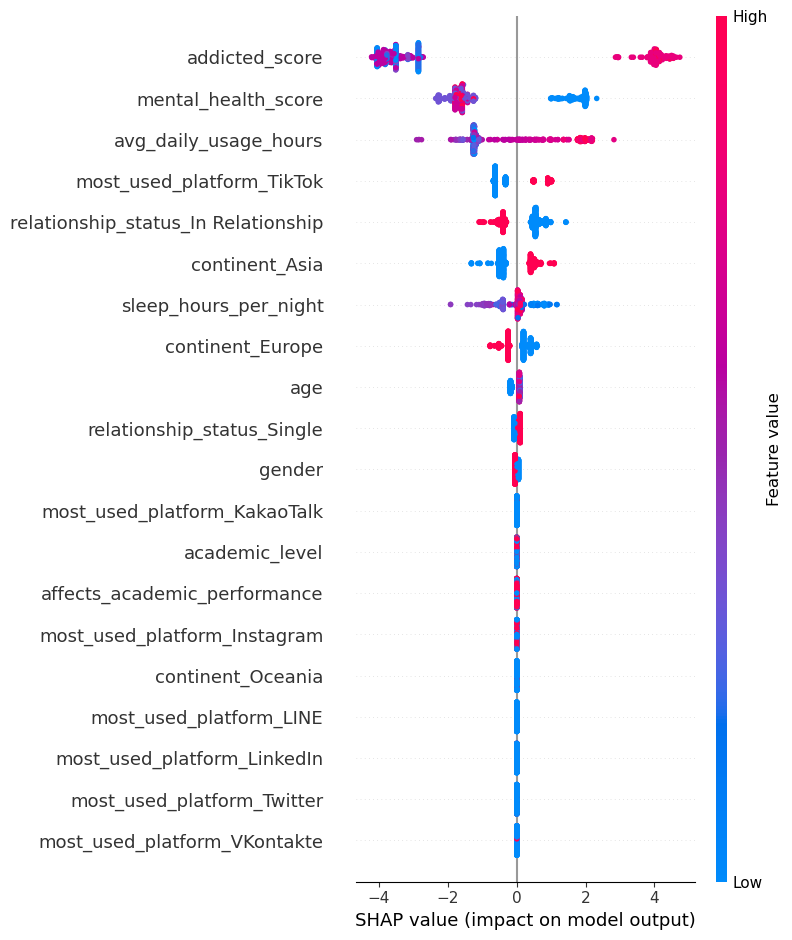

✅ SHAP summary plot generated and logged.


In [25]:
# =======================
# SHAP for Best Model: XGBoost
# =======================

import shap
import matplotlib.pyplot as plt

# 1. Train best model on original scaled data (not PCA)
best_model = XGBClassifier(eval_metric="logloss")
best_model.fit(X_train_scaled, y_train)

# 2. Explain model predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_scaled)

# 3. Plot summary plot (be sure to show names)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)


print("✅ SHAP summary plot generated and logged.")


## 🧠 Model Interpretability Insights

 The SHAP results revealed that the following features are the key contributors to conflict in relationships due to social media:

--> Addicted_score

--> Most_used_platform_TikTok

--> Avg_daily_usage_hours

--> Mental_health_code

These features consistently showed high SHAP values, indicating a strong influence on the model’s predictions. This insight not only strengthens the model’s credibility but also helps us focus on the most impactful factors for further intervention or awareness strategies.




## 📌 Recommended Strategies Based on Model Insights


1. Digital Well-being Campaigns

**Objective:** Educate users on healthy social media habits.

Tactics:

--> Launch short videos or infographics showing the impact of excessive usage (especially on platforms like TikTok).

--> Promote regular screen-time breaks and app usage tracking.



2. Mental Health Integration

**Objective:** Address underlying mental health challenges linked to social media use.

Tactics:

--> Partner with mental health professionals to provide short online sessions or resources.

--> Offer anonymous mental health assessments or check-ins through a chatbot or app.

--> Add "mental health awareness" content to social media feeds.



3. Relationship Conflict Awareness Series

**Objective:** Highlight how social media behavior can trigger relational conflicts.

Tactics:

--> Share real-life stories or animated scenarios showing the consequences of addiction and overuse.

--> Develop guides for couples or friends to establish healthy boundaries with tech.



4. Digital Detox Challenges

**Objective:** Reduce dependence on social platforms.

Tactics:

--> Create weekly challenges like "No TikTok Tuesday" or “Weekend Offline.”

--> Reward participation with digital badges or incentives.



5. Parental & Youth Workshops

**Objective:** Prevent addictive behavior in younger users.

Tactics:

--> Organize webinars for parents on signs of digital addiction and how to guide their children.

--> Run peer-led workshops in schools or universities.



6. AI-Based Alert System (Advanced Idea)

**Objective:** Use ML insights to provide real-time feedback.

Tactics:

-->Build a feature in the app to alert users 